In [1]:
!pip install seaborn --quiet
!pip install scikit-learn --quiet
#!pip install tensorflow --quiet
!pip install keras --quiet
!pip install matplotlib --quiet
!pip install pandas --quiet
!pip install numpy --quiet
!pip install torch --quiet
!pip install imbalanced-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.1 MB/s eta 0:00:00


In [2]:
# Importa el módulo 'drive' desde la librería 'google.colab' para interactuar con Google Drive
from google.colab import drive

# Monta el sistema de archivos de Google Drive en la ruta especificada '/content/drive/'
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Importa el módulo 'sys' para interactuar con el sistema, como las rutas de búsqueda de módulos
import sys

# Agrega la ruta especificada al listado de directorios donde Python busca módulos
# Esto permite importar módulos personalizados desde Google Drive, en este caso, desde la carpeta 'ML_Aprendizaje_Profundo/2025-espectro-banano'
sys.path.append('/content/drive/MyDrive/ML_Aprendizaje_Profundo/2025-espectro-banano/')

# Importa el módulo 'os' para interactuar con el sistema operativo, como manejo de archivos y directorios
import os

# Importa la librería 'pandas' con el alias 'pd' para manipulación y análisis de datos en estructuras como DataFrames
import pandas as pd

# Importa la librería 'numpy' con el alias 'np' para operaciones numéricas y manejo de arreglos
import numpy as np

# Importa un módulo personalizado 'dataFunction3' con el alias 'datF', probablemente con funciones definidas por el usuario
import dataFunction3 as datF

# Importa un módulo personalizado 'dataFunction3' con el alias 'datF', probablemente con funciones definidas por el usuario
import dataFunction4 as datF4

# Importa 'pyplot' de la librería 'matplotlib' con el alias 'plt' para crear visualizaciones como gráficos
import matplotlib.pyplot as plt

# Importa la librería 'seaborn' con el alias 'sns' para visualizaciones estadísticas avanzadas y estilizadas
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.manifold import TSNE

# Aplica el tema predeterminado de 'seaborn' para estilizar las visualizaciones generadas
sns.set_theme()

In [5]:
# Nombre del archivo CSV a leer
file = 'newdatos-Junio14-dataset.csv'

# Ruta base en Google Drive donde está el archivo
path = r"/content/drive/MyDrive/ML_Aprendizaje_Profundo/2025-espectro-banano/"

# Reemplaza barras invertidas por diagonales (redundante aquí)
path = path.replace('\\', '/')

# Combina la ruta y el nombre del archivo
file = os.path.join(path, file)

# Lee el CSV con separador ';' y lo carga en un DataFrame
df = pd.read_csv(file, sep=';')

In [6]:
# Recibe el DataFrame 'df' como parámetro para identificar o procesar las clases/categorías únicas en los datos
datF.clasesDiferentes(df)


Clases diferentes en la columna dpi:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]

Clases diferentes en la columna Sana:
[ 1  0 -1]
Donde:

1 es Sana
0 es Fusarium
-1 es E_Hidrico

Clases diferentes en la columna Tratamiento:
['Control' 'Ralstonia' 'Fusarium' 'E_Hidrico' 'Ral_Fus' 'Ral_EH'
 'Fus_EH_Ral' 'Fus_EH']



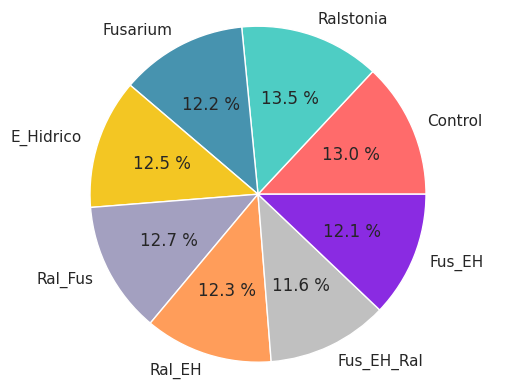

In [7]:
# visualiza la distribución de los datos por la columna "Sana" y se cuenta cuántas veces aparece cada clase usando la columna "dpi"


 # Se agrupan los datos por la columna "Tratamiento" y se cuenta cuántas veces aparece cada clase usando la columna "dpi"
ddf = df[["Tratamiento", "dpi"]].groupby("Tratamiento").count()
# Se reestructura el DataFrame para que sea un arreglo plano de 3 elementos (uno por clase)
ddf = ddf.values.reshape(
    8,
)

# Nombres asignados a cada clase en el gráfico de pastel (en orden acorde a la codificación en "Sana")
nombres = ['Control', 'Ralstonia', 'Fusarium', 'E_Hidrico', 'Ral_Fus', 'Ral_EH', 'Fus_EH_Ral', 'Fus_EH']
# Colores personalizados para cada segmento del gráfico
colores = [
  "#FF6B6B", # Rojo Coral
  "#4ECDC4", # Turquesa
  "#4793AF", # Azul Acero
  "#F3C623", # Amarillo Sol
  "#A3A0C0", # Lavanda Suave
  "#FF9D5A", # Naranja Durazno
  "#C0C0C0", # Gris Plata
  "#8A2BE2"  # Azul Violeta
]
# Se genera el gráfico de pastel con porcentajes y colores definidos
plt.pie(ddf, labels=nombres, autopct="%0.1f %%", colors=colores)

# Asegura que el gráfico tenga forma circular
plt.axis("equal")

# Muestra el gráfico
plt.show()

In [8]:
# Eliminar Sana
'''
Razón: La tabla cruzada muestra una fuerte correlación entre Tratamiento y Sana
(por ejemplo, Control y Ralstonia son siempre Sana = 1, Fus_EH es siempre Fusarium = 0).
Incluir Tratamiento causaría data leakage
 '''
df = df.drop(columns=['Sana'])

In [9]:
# Etiquetado de 'Tratamiento' en 2 categorías
def map_tratamiento(t):
    if t == 'Control':
        return 0            # 0 para "Sana" (solo Control)
    else:
        return 1            # 1 para "Enfermas" (todas las demás, incluyendo E_Hidrico)

df['Tratamiento_lbl'] = df['Tratamiento'].apply(map_tratamiento)



df

,dpi,Tratamiento,350,351,352,353,354,355,356,357,...,2492,2493,2494,2495,2496,2497,2498,2499,2500,Tratamiento_lbl
0,0,Control,0.061030,0.060394,0.053344,0.054736,0.057163,0.055928,0.049880,0.043096,...,0.044834,0.044802,0.044657,0.044370,0.044198,0.044046,0.043928,0.043878,0.043752,0
1,0,Control,0.060823,0.060909,0.056016,0.056755,0.057975,0.056499,0.051715,0.047413,...,0.037458,0.037266,0.037120,0.036929,0.036832,0.036861,0.036779,0.036661,0.036570,0
2,0,Control,0.059742,0.060113,0.057320,0.059280,0.059741,0.057078,0.053557,0.049205,...,0.036049,0.035732,0.035558,0.035431,0.035338,0.035368,0.035286,0.035157,0.035058,0
3,0,Control,0.048861,0.047099,0.044486,0.049340,0.052701,0.050598,0.044007,0.038449,...,0.033762,0.033693,0.033536,0.033412,0.033204,0.032831,0.032637,0.032501,0.032376,0
4,0,Control,0.063155,0.060788,0.057388,0.058424,0.060128,0.059009,0.053017,0.048921,...,0.033729,0.033675,0.033571,0.033515,0.033441,0.033317,0.033257,0.033285,0.033205,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,15,Fus_EH_Ral,0.043432,0.040299,0.044928,0.043590,0.043106,0.043309,0.039035,0.036975,...,0.457364,0.456816,0.456330,0.455801,0.455405,0.455075,0.454813,0.454657,0.454506,1
3533,15,Fus_EH_Ral,0.060325,0.058118,0.063626,0.059556,0.056792,0.055577,0.048689,0.050063,...,0.031205,0.031081,0.030896,0.030624,0.030500,0.030449,0.030357,0.030360,0.030226,1
3534,15,Fus_EH_Ral,0.062275,0.062429,0.065365,0.062081,0.061105,0.061609,0.056559,0.058367,...,0.467545,0.467278,0.466877,0.466423,0.466098,0.465760,0.465483,0.465317,0.465222,1
3535,15,Fus_EH_Ral,0.062731,0.059813,0.065723,0.062644,0.058222,0.055873,0.054696,0.053367,...,0.037925,0.037779,0.037653,0.037614,0.037422,0.037161,0.036949,0.036626,0.036474,1


In [10]:
print("Nueva distribución de clases en 'Tratamiento_lbl':")
print(df['Tratamiento_lbl'].value_counts())
print("\n")
print( '0: ' "Sana (Control)\n"
        '1: ' "Enfermas (todas las demás)")
df['Tratamiento_lbl'] = df['Tratamiento'].apply(map_tratamiento)

Nueva distribución de clases en 'Tratamiento_lbl':
Tratamiento_lbl
1    3076
0     461
Name: count, dtype: int64


0: Sana (Control)
1: Enfermas (todas las demás)


In [11]:
# Separar características y variable objetivo
X = df.drop(columns=['Tratamiento', 'Tratamiento_lbl'])   # ‼️  NO incluimos variables categóricas
y = df['Tratamiento_lbl']


In [12]:
# Divide los datos en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=87, stratify=y
)

print(f"train size: {y_train.shape[0]}\n test size: {y_test.shape[0]}")

train size: 2829
 test size: 708


In [13]:
# -CONTADORES POR CLASE -
cls_num_list = [
    int((y_train == 0).sum()),    # Sana
    int((y_train == 1).sum())     # Enfermas
]
print("cls_num_list:", cls_num_list)

cls_num_list: [369, 2460]


In [14]:
label_names         = ['Sana', 'Enfermas'] # NOMBRES DE LAS NUEVAS CLASES
num_classes         = 2 # CAMBIADO A 2 CLASES
input_dim           = X_train.shape[1]

In [15]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_classes): # num_classes ahora es 2
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes) # La capa de salida debe coincidir con num_classes
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [16]:
# LDAM Loss
def get_ldam_loss(cls_num_list, max_m=0.5, s=30):
    m_list = 1. / np.sqrt(np.sqrt(cls_num_list))
    m_list = m_list * (max_m / m_list.max())
    m_list = torch.tensor(m_list, dtype=torch.float32, device='cpu')
    def ldam_loss(x, target):
        idx = torch.zeros_like(x, dtype=torch.bool)
        idx.scatter_(1, target.unsqueeze(1), 1)
        batch_m = m_list[target].view(-1, 1)
        return F.cross_entropy(s*(x - batch_m*idx.float()), target)
    return ldam_loss

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def entrenar_mlp(Xtr, ytr, Xte, yte, cls_num_list, epochs=200, lr=1e-3):
    model   = MLP(input_dim, num_classes).cpu() # num_classes es 2 ahora
    optim   = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = get_ldam_loss(cls_num_list)

    Xtr = torch.tensor(Xtr.values, dtype=torch.float32, device='cpu')
    ytr = torch.tensor(ytr.values, dtype=torch.long,    device='cpu')
    Xte = torch.tensor(Xte.values, dtype=torch.float32, device='cpu')
    yte = torch.tensor(yte.values, dtype=torch.long,    device='cpu')

    for ep in range(epochs):
        model.train()
        optim.zero_grad()
        loss = loss_fn(model(Xtr), ytr)
        loss.backward(); optim.step()

        if (ep+1) % 10 == 0:
            model.eval()
            with torch.no_grad():
                acc = (model(Xte).argmax(1) == yte).float().mean().item()
            print(f"Epoch {ep+1:03}/{epochs} - Loss {loss.item():.4f} - Acc {acc:.4f}")

    # ---------- matriz de confusión ----------
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
    model.eval(); preds = model(Xte).argmax(1).cpu().numpy()
    cm = confusion_matrix(yte.cpu().numpy(), preds)
    ConfusionMatrixDisplay(cm, display_labels=label_names).plot(cmap='Blues')
    plt.title("Test Confusion Matrix"); plt.show()
    print("Test accuracy:", accuracy_score(yte.cpu().numpy(), preds))


=== LDAM ===
Epoch 010/200 - Loss 3.5229 - Acc 0.8701
Epoch 020/200 - Loss 3.5223 - Acc 0.8701
Epoch 030/200 - Loss 3.5096 - Acc 0.8701
Epoch 040/200 - Loss 3.5016 - Acc 0.8701
Epoch 050/200 - Loss 3.4969 - Acc 0.8701
Epoch 060/200 - Loss 3.4949 - Acc 0.8701
Epoch 070/200 - Loss 3.4917 - Acc 0.8701
Epoch 080/200 - Loss 3.4886 - Acc 0.8701
Epoch 090/200 - Loss 3.4858 - Acc 0.8701
Epoch 100/200 - Loss 3.4832 - Acc 0.8701
Epoch 110/200 - Loss 3.4805 - Acc 0.8701
Epoch 120/200 - Loss 3.4779 - Acc 0.8701
Epoch 130/200 - Loss 3.4753 - Acc 0.8701
Epoch 140/200 - Loss 3.4727 - Acc 0.8701
Epoch 150/200 - Loss 3.4700 - Acc 0.8701
Epoch 160/200 - Loss 3.4674 - Acc 0.8701
Epoch 170/200 - Loss 3.4647 - Acc 0.8701
Epoch 180/200 - Loss 3.4620 - Acc 0.8701
Epoch 190/200 - Loss 3.4593 - Acc 0.8701
Epoch 200/200 - Loss 3.4565 - Acc 0.8701


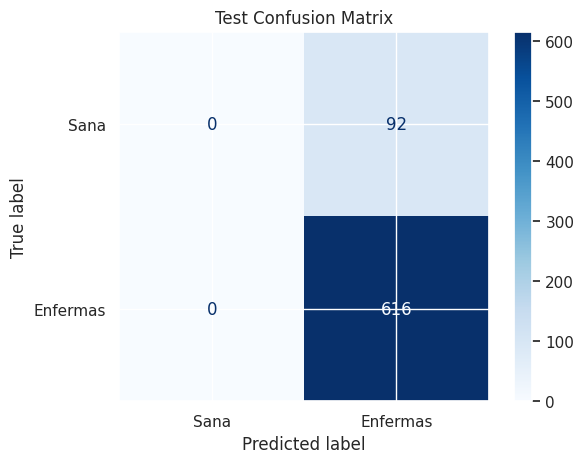

Test accuracy: 0.8700564971751412


In [18]:
# ------------ EXPERIMENTO 1: LDAM ----------------
print("\n=== LDAM ===")
entrenar_mlp(X_train, y_train, X_test, y_test, cls_num_list)


=== LDAM + SMOTE ===
Epoch 010/200 - Loss 12.7270 - Acc 0.2203
Epoch 020/200 - Loss 12.3810 - Acc 0.2472
Epoch 030/200 - Loss 11.7140 - Acc 0.3771
Epoch 040/200 - Loss 11.1513 - Acc 0.3475
Epoch 050/200 - Loss 10.4226 - Acc 0.5508
Epoch 060/200 - Loss 9.6950 - Acc 0.5975
Epoch 070/200 - Loss 9.2949 - Acc 0.6356
Epoch 080/200 - Loss 9.1514 - Acc 0.6610
Epoch 090/200 - Loss 8.8855 - Acc 0.6144
Epoch 100/200 - Loss 8.8526 - Acc 0.6412
Epoch 110/200 - Loss 8.6413 - Acc 0.6455
Epoch 120/200 - Loss 8.5870 - Acc 0.7218
Epoch 130/200 - Loss 8.5767 - Acc 0.6045
Epoch 140/200 - Loss 8.3978 - Acc 0.6836
Epoch 150/200 - Loss 8.4395 - Acc 0.7246
Epoch 160/200 - Loss 8.0689 - Acc 0.7189
Epoch 170/200 - Loss 8.0650 - Acc 0.7458
Epoch 180/200 - Loss 7.7740 - Acc 0.6963
Epoch 190/200 - Loss 8.4461 - Acc 0.8150
Epoch 200/200 - Loss 9.8954 - Acc 0.6751


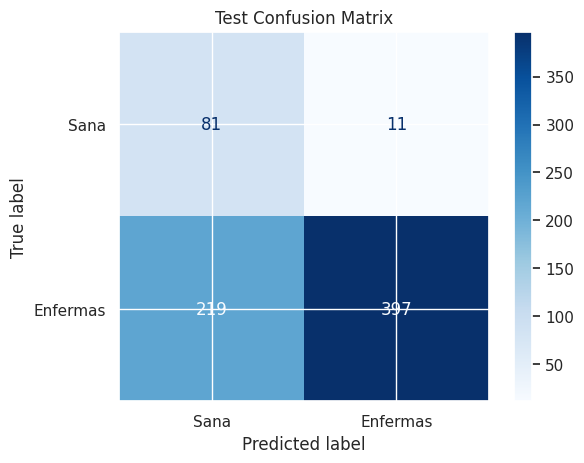

Test accuracy: 0.6751412429378532


In [19]:
# ----------- EXPERIMENTO 2: LDAM + SMOTE ---------
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
Xtr_sm, ytr_sm = sm.fit_resample(X_train, y_train)

cls_num_sm = [int((ytr_sm == i).sum()) for i in range(num_classes)] # num_classes es 2
print("\n=== LDAM + SMOTE ===")
entrenar_mlp(Xtr_sm, ytr_sm, X_test, y_test, cls_num_sm)


=== LDAM + DeepSMOTE (con Autoencoder) ===
Entrenando Autoencoder con 100 épocas...
Autoencoder Epoch 20/100, Loss: 0.1388
Autoencoder Epoch 40/100, Loss: 0.0406
Autoencoder Epoch 60/100, Loss: 0.0293
Autoencoder Epoch 80/100, Loss: 0.0245
Autoencoder Epoch 100/100, Loss: 0.0189
cls_num_ds (después de DeepSMOTE): [2460, 2460]
Epoch 010/200 - Loss 14.3907 - Acc 0.1822
Epoch 020/200 - Loss 13.4191 - Acc 0.2076
Epoch 030/200 - Loss 12.8795 - Acc 0.2161
Epoch 040/200 - Loss 12.6358 - Acc 0.5028
Epoch 050/200 - Loss 12.5858 - Acc 0.3418
Epoch 060/200 - Loss 12.4984 - Acc 0.3008
Epoch 070/200 - Loss 11.8902 - Acc 0.2797
Epoch 080/200 - Loss 11.5378 - Acc 0.3065
Epoch 090/200 - Loss 11.2509 - Acc 0.4068
Epoch 100/200 - Loss 10.9008 - Acc 0.3997
Epoch 110/200 - Loss 10.6218 - Acc 0.4802
Epoch 120/200 - Loss 10.3836 - Acc 0.5607
Epoch 130/200 - Loss 10.2124 - Acc 0.5494
Epoch 140/200 - Loss 11.0473 - Acc 0.4407
Epoch 150/200 - Loss 10.1347 - Acc 0.5198
Epoch 160/200 - Loss 9.8445 - Acc 0.6271


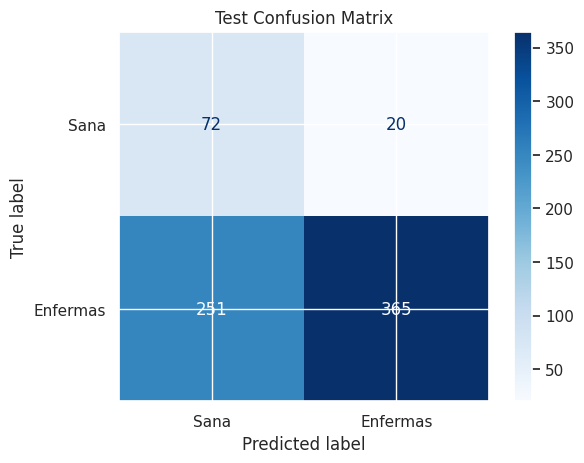

Test accuracy: 0.617231638418079


In [20]:
# --------- NUEVO EXPERIMENTO 3: LDAM + "DeepSMOTE" (con Autoencoder) -----

# Definición del Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim), # Capa latente
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            # nn.Sigmoid() # Usar si los datos están normalizados entre 0 y 1 (imágenes)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Función para entrenar el Autoencoder
def train_autoencoder(X_data, input_dim, latent_dim, epochs=100, lr=1e-3):
    autoencoder = Autoencoder(input_dim, latent_dim)
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=lr)
    criterion = nn.MSELoss() # Pérdida de reconstrucción, MSE para datos continuos

    X_tensor = torch.tensor(X_data.values, dtype=torch.float32, device='cpu')

    print(f"Entrenando Autoencoder con {epochs} épocas...")
    for epoch in range(epochs):
        autoencoder.train()
        optimizer.zero_grad()
        outputs = autoencoder(X_tensor)
        loss = criterion(outputs, X_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 20 == 0:
            print(f"Autoencoder Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")
    return autoencoder

# Función para aplicar DeepSMOTE
def apply_deep_smote(X_train_df, y_train_series, autoencoder_model, latent_dim, num_classes):
    # Convertir a tensores para el autoencoder
    X_train_tensor = torch.tensor(X_train_df.values, dtype=torch.float32, device='cpu')

    # Obtener representaciones latentes de todas las muestras
    autoencoder_model.eval()
    with torch.no_grad():
        X_latent = autoencoder_model.encoder(X_train_tensor).cpu().numpy()

    # Identificar las clases minoritarias en el conjunto original para SMOTE
    # Aquí estamos asumiendo que quieres sobremuestrear hasta que todas las clases tengan el mismo número
    # de muestras que la clase mayoritaria en X_train_original
    # O, si ya usaste SMOTE antes y X_train_df es el dataset sobremuestreado con SMOTE tradicional,
    # simplemente aplicamos SMOTE en el espacio latente del autoencoder a las clases minoritarias
    # en ese dataset sobremuestreado.
    # Para ser puristas con "DeepSMOTE", solo se aplica SMOTE a las muestras de la clase minoritaria ORIGINAL.
    # Aquí, vamos a generar muestras adicionales para las clases minoritarias del dataset *ya sobremuestreado* por SMOTE,
    # lo cual es una variación o una segunda fase de aumento.

    # Paso 1: Obtener las representaciones latentes de las clases minoritarias del dataset ORIGINAL
    # (¡Si no quieres sobremuestrear *más* allá de lo que ya hizo SMOTE!)
    # Vamos a usar la lógica original de aplicar SMOTE a X_train_original en el espacio latente.
    # Primero, necesitamos las etiquetas originales para saber qué es minoritario.
    X_train_original_tensor = torch.tensor(X_train.values, dtype=torch.float32, device='cpu')
    with torch.no_grad():
        X_latent_original = autoencoder_model.encoder(X_train_original_tensor).cpu().numpy()

    # Aplicar SMOTE en el espacio latente de las CLASES MINORITARIAS ORIGINALES
    sm_latent = SMOTE(random_state=42)
    X_latent_resampled, y_resampled = sm_latent.fit_resample(X_latent_original, y_train_series)

    # Decodificar las nuevas muestras sintéticas del espacio latente
    X_latent_resampled_tensor = torch.tensor(X_latent_resampled, dtype=torch.float32, device='cpu')
    with torch.no_grad():
        X_deeps_synthetic = autoencoder_model.decoder(X_latent_resampled_tensor).cpu().numpy()

    # Asegurarse de que X_deeps_synthetic tenga la misma forma de DataFrame que se espera
    X_deeps_synthetic_df = pd.DataFrame(X_deeps_synthetic, columns=X_train_df.columns)

    return X_deeps_synthetic_df, y_resampled


print("\n=== LDAM + DeepSMOTE (con Autoencoder) ===")

# --- Configuración del Autoencoder ---
latent_dim = 16 # Dimensión del espacio latente (ajusta según tus datos, menor que input_dim)
ae_epochs = 100 # Épocas para entrenar el autoencoder
ae_lr = 1e-3  # Learning rate para el autoencoder

# 1. Entrenar el Autoencoder con el dataset de entrenamiento original
# Es importante que el autoencoder aprenda del dataset original para obtener buenas representaciones
autoencoder = train_autoencoder(X_train, input_dim, latent_dim, ae_epochs, ae_lr)

# 2. Aplicar DeepSMOTE
# Esta función ahora maneja la obtención de representaciones latentes, SMOTE en ese espacio
# y la decodificación de las nuevas muestras.
# Pasamos X_train y y_train (el dataset de entrenamiento original)
Xtr_deeps, ytr_deeps = apply_deep_smote(X_train, y_train, autoencoder, latent_dim, num_classes)


# 3. Calcular los contadores de clase para el dataset transformado por DeepSMOTE
cls_num_ds = [int((ytr_deeps == i).sum()) for i in range(num_classes)]
print("cls_num_ds (después de DeepSMOTE):", cls_num_ds)


# 4. Entrenar el MLP con LDAM usando los datos de DeepSMOTE
entrenar_mlp(Xtr_deeps, ytr_deeps, X_test, y_test, cls_num_ds)